1/1 [==============================] - 0s 101ms/step
truck
Spent: 0:00:00.310145
1/1 [==============================] - 0s 14ms/step
[0.96970916 0.00601914 0.00229781 0.9999959  0.02081916]


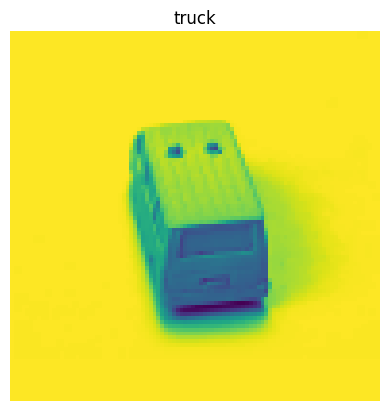

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

start = datetime.now()

IM_SIZE = 96
BATCH_SIZE = 4

def resize_rescale(image):
    return tf.image.resize(image, (IM_SIZE, IM_SIZE))/255.0

def decide_type(l: list):
    if (l[0] == l[1] or l[0] == l[2] or l[0] == l[3] or l[0] == l[4]
        or l[1] == l[2] or l[1] == l[3] or l[1] == l[4] or l[2] == l[3]
        or l[2] == l[4] or l[3] == l[4]):
        return "underfined"
    if np.argmax(l) == 0:
        return "animal"
    if np.argmax(l) == 1:
        return "human"
    if np.argmax(l) == 2:
        return "plane"
    if np.argmax(l) == 3:
        return "truck"
    if np.argmax(l) == 4:
        return "car"

dataset = tf.data.Dataset.from_tensor_slices((np.load("dataset.npy")))
dataset = dataset.shuffle(BATCH_SIZE).batch(BATCH_SIZE)

lenet_model = tf.keras.models.load_model('model.h5')

for i, (image) in enumerate(dataset.take(1)):
    np.save('result.npy', image[0])

dataset = dataset.map(resize_rescale)

print(str(decide_type(lenet_model.predict(dataset.take(1))[0])) + "\nSpent: " + str(datetime.now() - start))

for i, (image) in enumerate(dataset.take(1)):
    ax = plt.subplot(1, 1, i + 1)
    plt.imshow(image[0])
    plt.title(str(decide_type(lenet_model.predict(image)[0])))
    print(lenet_model.predict(image)[0])
    plt.axis('off')